In [84]:
import vk  

In [85]:
import re

In [86]:
token = ""  
session = vk.Session(access_token=token)  
vk_api = vk.API(session)  

 

In [87]:
personal_token = ""  
session = vk.Session(access_token=personal_token)  
vk_personal_api = vk.API(session)  

In [64]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [65]:
members = get_members ("ira_psp")

In [66]:
len(members)

8274

In [67]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] 
            first_name = member["first_name"] 
            last_name = member["last_name"] 
            
            sex = member["sex"] 
            if int(sex) == 1:  
                sex = "F"  # 
            elif int(sex) == 2:  
                sex = "M" 
            else:  
                sex = "-"  
                
            bdate = member.get('bdate', "-")   
            if len(bdate.split(".")) == 3:  
                bdate = bdate.split(".")[-1]  
            else:  
                bdate = "-"  
                
            city = member.get('city', {}).get("title", "-")  
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  

In [68]:
with open("members.tsv", 'w', encoding='utf-8') as f:
    for member in members:
        print (member)
save_members_to_file ("members.tsv", members)

{'id': 979, 'first_name': 'Malik', 'last_name': 'Malik', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'kilam', 'city': {'id': 2, 'title': 'Saint Petersburg'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 32369, 'first_name': 'Vladislav', 'last_name': 'Denchik', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'fedchuk', 'bdate': '31.1.1990'}
{'id': 33081, 'first_name': 'Marina', 'last_name': 'Zudina', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'minerva10', 'bdate': '19.6', 'city': {'id': 95, 'title': 'Nizhny Novgorod'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 72723, 'first_name': 'Nikita', 'last_name': 'Smirnov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'nickysmiles', 'bdate': '2.5.1988', 'city': {'id': 2, 'title': 'Saint Petersburg'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 111699, 'first_name': 'Denis', 'last_name': 'Fedorov', 'is_closed': False, 'can_access_closed': True, 'se

{'id': 66666702, 'first_name': 'Svetlana', 'last_name': 'Kruk', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'id66666702', 'bdate': '7.9', 'city': {'id': 2917, 'title': 'Khmelnitsky'}, 'country': {'id': 2, 'title': 'Ukraine'}}
{'id': 66699675, 'first_name': 'Sergey', 'last_name': 'Mikhaylov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id66699675', 'country': {'id': 1, 'title': 'Russia'}}
{'id': 66710939, 'first_name': 'Danila', 'last_name': 'Vikulov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'drake888', 'bdate': '22.2.1999', 'city': {'id': 1, 'title': 'Moscow'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 66753922, 'first_name': 'Vlad', 'last_name': 'Rybalko', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'vlad_r24', 'bdate': '24.4.1991', 'city': {'id': 1922897, 'title': 'Warszawa'}, 'country': {'id': 160, 'title': 'Poland'}}
{'id': 66835211, 'first_name': 'Aziz', 'last_name': 'Ahmedov', '

{'id': 149032874, 'first_name': 'Ruslana', 'last_name': 'Povzanyuk', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'zozylka141120', 'bdate': '14.11', 'country': {'id': 9, 'title': 'USA'}}
{'id': 149155294, 'first_name': 'Mirza', 'last_name': 'Badalov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id149155294', 'city': {'id': 1957236, 'title': 'Baku'}, 'country': {'id': 5, 'title': 'Azerbaijan'}}
{'id': 149167316, 'first_name': 'Valeria', 'last_name': 'Lizogub', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'v_lizogub', 'bdate': '12.5', 'city': {'id': 314, 'title': 'Kyiv'}, 'country': {'id': 2, 'title': 'Ukraine'}}
{'id': 149167376, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 1, 'domain': 'id149167376'}
{'id': 149221234, 'first_name': 'Alyona', 'last_name': 'Galushkina', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'mezurnova', 'bdate': '27.4', 'city': {'id': 891, 'title

{'id': 221820678, 'first_name': 'Olesya', 'last_name': 'Kozenkova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'olesyaidilliya', 'bdate': '24.7', 'city': {'id': 467, 'title': 'Mogilev'}, 'country': {'id': 3, 'title': 'Belarus'}}
{'id': 221822251, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 2, 'domain': 'id221822251'}
{'id': 221831952, 'first_name': 'Emin', 'last_name': 'Aslanov', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'id221831952', 'bdate': '20.2', 'city': {'id': 38, 'title': 'Vladikavkaz'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 221922675, 'first_name': 'Farkhat', 'last_name': 'Kozhanov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'fkozhanov97', 'bdate': '9.2.1997', 'city': {'id': 183, 'title': 'Almaty'}, 'country': {'id': 4, 'title': 'Kazakhstan'}}
{'id': 222057646, 'first_name': 'Anna', 'last_name': 'Popova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'd

{'id': 273769331, 'first_name': 'Anton', 'last_name': 'Putalov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id273769331', 'bdate': '8.5', 'city': {'id': 149, 'title': 'Ulyanovsk'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 273858856, 'first_name': 'Alexander', 'last_name': 'Sergeevich', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id273858856', 'city': {'id': 314, 'title': 'Kyiv'}, 'country': {'id': 2, 'title': 'Ukraine'}}
{'id': 273863846, 'first_name': 'Aslan', 'last_name': 'Volk', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'turnik2015'}
{'id': 273880407, 'first_name': 'Andrey', 'last_name': 'Lyubimov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'andreylybimov98', 'bdate': '27.6.1993', 'city': {'id': 1, 'title': 'Moscow'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 273898188, 'first_name': 'Nikita', 'last_name': 'Krylov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 

{'id': 334394529, 'first_name': 'Raynur', 'last_name': 'Tagirov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id334394529', 'bdate': '12.8.1995', 'country': {'id': 1, 'title': 'Russia'}}
{'id': 334405033, 'first_name': 'Migel', 'last_name': 'Kiosse', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'likeismi', 'city': {'id': 133, 'title': 'Sochi'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 334429831, 'first_name': 'Diana', 'last_name': 'Danilova', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'id334429831', 'bdate': '7.4', 'city': {'id': 1042375, 'title': 'Eyskoe Ukreplenie'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 334638665, 'first_name': 'DELETED', 'last_name': '', 'deactivated': 'deleted', 'sex': 2, 'domain': 'id334638665'}
{'id': 334723867, 'first_name': 'Sabrina', 'last_name': 'Gold', 'is_closed': False, 'can_access_closed': True, 'sex': 1, 'domain': 'id334723867', 'city': {'id': 537, 'title': 'Varash / 

{'id': 571954038, 'first_name': 'Danil', 'last_name': 'Zotov', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'id571954038'}
{'id': 572540319, 'first_name': 'Nikol', 'last_name': 'Smirnova', 'is_closed': True, 'can_access_closed': False, 'sex': 1, 'domain': 'id572540319', 'bdate': '12.8.1986'}
{'id': 573025461, 'first_name': 'Firuz', 'last_name': 'Makhsudov', 'is_closed': False, 'can_access_closed': True, 'sex': 2, 'domain': 'id573025461', 'bdate': '5.5.1989'}
{'id': 573632420, 'first_name': 'Felix', 'last_name': 'Zhelezny', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'bymerangvam', 'city': {'id': 1, 'title': 'Moscow'}, 'country': {'id': 1, 'title': 'Russia'}}
{'id': 573782313, 'first_name': 'Vladimir', 'last_name': 'Nechaev', 'is_closed': True, 'can_access_closed': False, 'sex': 2, 'domain': 'id573782313', 'bdate': '6.5.2004'}
{'id': 574869599, 'first_name': 'Alexey', 'last_name': 'Olegovich', 'deactivated': 'deleted', 'sex': 2, 'domain': 'id

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import pandas as pd

df = pd.read_csv("members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [71]:
df.head(10)

,id,name,surname,sex,birth,city,country
0,"979,",Malik,Malik,M,-,Saint Petersburg,Russia
1,"32369,",Vladislav,Denchik,M,1990,-,-
2,"33081,",Marina,Zudina,F,-,Nizhny Novgorod,Russia
3,"72723,",Nikita,Smirnov,M,1988,Saint Petersburg,Russia
4,"111699,",Denis,Fedorov,M,-,Saint Petersburg,Russia
5,"130106,",Vladislav,Bessinny,M,1988,Saint Petersburg,Russia
6,"140453,",Tatyana,Mitrokhina,F,1987,Saint Petersburg,Russia
7,"148051,",Evgeny,Ignatov,M,1986,Nizhny Novgorod,Russia
8,"150192,",Irina,Setkina,F,1993,Saint Petersburg,Russia
9,"151979,",Lenochka,Ermak,F,-,Saint Petersburg,Russia


In [72]:
city_count  = df['city'].value_counts().drop('-') 
city_count = city_count[:20] 
print(city_count)

Moscow                     1132
Nizhny Novgorod             354
Saint Petersburg            332
Kyiv                        196
Yekaterinburg                81
Minsk                        70
Kharkiv                      66
Almaty                       66
Rostov-on-Don                60
Chelyabinsk                  57
Odessa                       55
Krasnodar                    54
Novosibirsk                  53
Kazan                        52
Dnipropetrovsk (Dnipro)      49
Samara                       48
Lviv                         46
Volgograd                    44
Perm                         43
Donetsk                      39
Name: city, dtype: int64


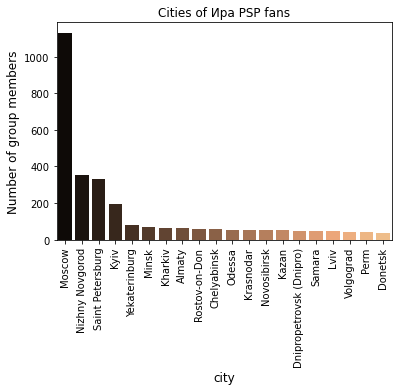

In [73]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of Ира PSP fans')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

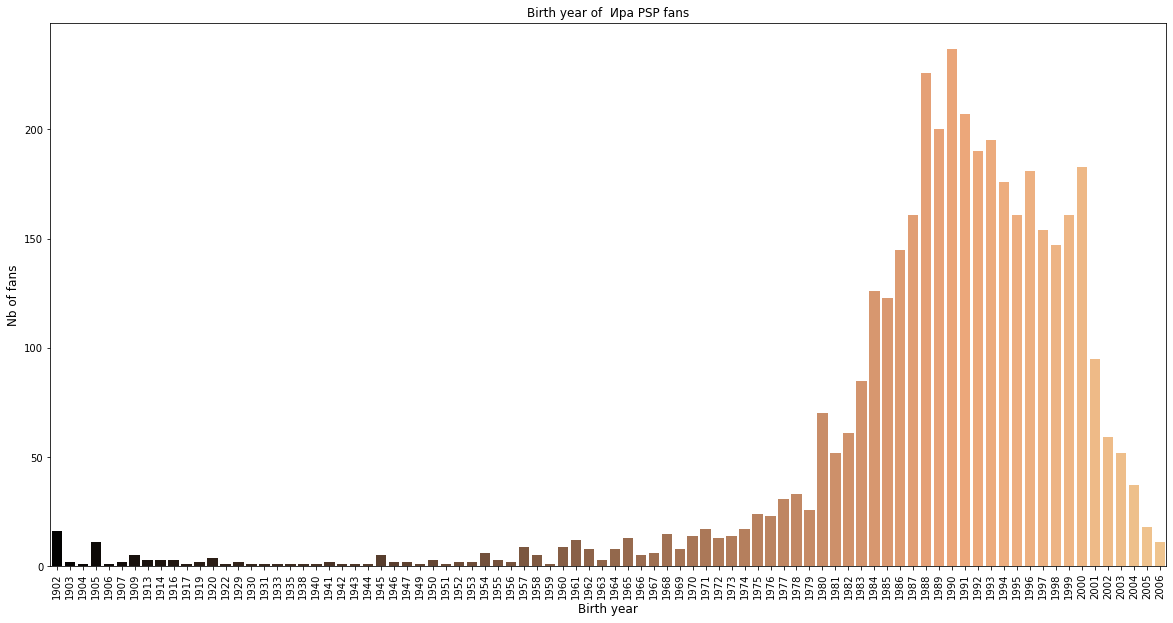

In [74]:
birth_count  = df['birth'].value_counts().drop('-') 
plt.figure(figsize=(20,10)) 
ax = sns.barplot(birth_count.index, birth_count.values, palette='copper') 
plt.title('Birth year of  Ира PSP fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 

In [75]:
new_df = df[df['sex'].ne('-')] 
new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') 

<ipython-input-75-79f7398bdecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['birth'] = pd.to_numeric(new_df['birth'], errors='coerce') # оставлем тех, кто указал свой возраст


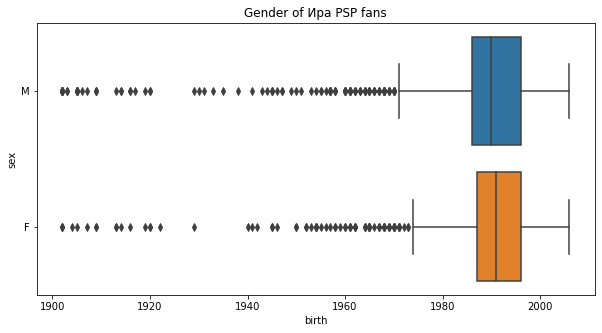

In [78]:
plt.figure(figsize=(10,5)) 
plt.title('Gender of Ира PSP fans')
sns.boxplot(x="birth", y="sex", data=new_df)
plt.show()

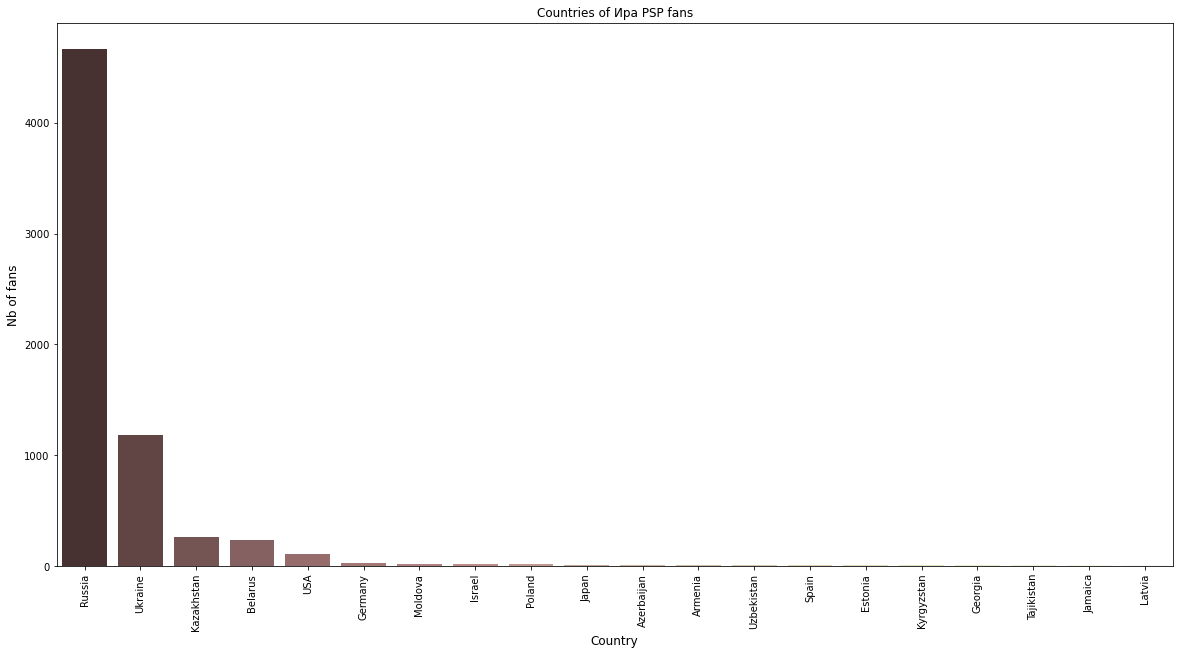

In [56]:
country_count = df["country"].value_counts().drop("-")
country_count = country_count [0:20]
plt.figure(figsize=(20,10))
ax = sns.barplot(country_count.index,country_count.values, palette="pink")
plt.title("Countries of Ира PSP fans")
plt.ylabel("Nb of fans", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [80]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Kazan')] = "msk + kzn"
df.loc[(df['city'] != "msk + kzn") & (df['city'] != "-")] = "province"

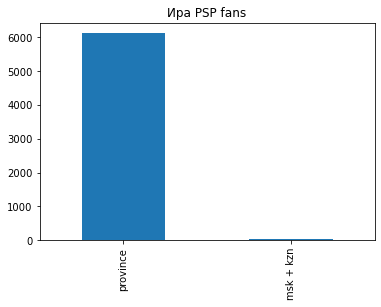

In [82]:
city_count  = df['city'].value_counts().drop('-') 
plt.title("Ира PSP fans")
city_count = city_count[:20] 
axes = city_count.plot.bar() 

In [38]:

with open("../domashka/aigelmusic_savemembers.tsv", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("../domashka/zatmenie_official_members.tsv", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("../domashka/members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

In [39]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members3.remove("")

In [40]:
united_members = members1.union(members2).union(members3)

In [41]:

intersected_members = members1.intersection(members2).intersection(members3)

In [42]:
with open("intersection.tsv", "w", encoding="utf-8") as w:
    for i in intersected_members:
        w.write(i+"\n")

In [43]:
print (len(intersected_members))

3


In [44]:
print (intersected_members)

{'74450877,\tDiana\tTsarkova\tF\t-\tMoscow\tRussia', '39081781,\tAnna\tNikonorova\tF\t-\tSaint Petersburg\tRussia', '205607257,\tIza\tMungieva\tF\t1997\tMoscow\tRussia'}


In [45]:
dl = pd.read_csv("intersection.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [23]:
dl

,id,name,surname,sex,birth,city,country
0,"74450877,",Diana,Tsarkova,F,-,Moscow,Russia
1,"39081781,",Anna,Nikonorova,F,-,Saint Petersburg,Russia
2,"205607257,",Iza,Mungieva,F,1997,Moscow,Russia


In [88]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  
    count = first["count"] // 100  
   
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [89]:
ira_psp_posts = get_posts("ira_psp")


In [90]:
for post in ira_psp_posts[:10]:
    print(post)

С верой в себя, идём до конца! ☀️
🤔 Как быть, если охота летать?
Ночь особое время суток, когда человеческие пороки достигают своего апогея 🔥🌑
[id3926689|Ира PSP] вместе [id5856094|Puffy Puff] отсудила финал хип-хоп фестиваля [club164863311|RAP DEVIL] в Нижнем Новгороде.
Уже завтра!
Горячий сборник для любителей женского рэпа 👍🏻😍
Я лечу на вечерину и со мной мои подруги 🤩
Солнце светит ☀️😊
Сила воли позволяет добиться мечты!
❤️ любовь наше всё ❤️


In [91]:
print (ira_psp_posts)

['С верой в себя, идём до конца! ☀️', '🤔 Как быть, если охота летать?', 'Ночь особое время суток, когда человеческие пороки достигают своего апогея 🔥🌑', '[id3926689|Ира PSP] вместе [id5856094|Puffy Puff] отсудила финал хип-хоп фестиваля [club164863311|RAP DEVIL] в Нижнем Новгороде.', 'Уже завтра!', 'Горячий сборник для любителей женского рэпа 👍🏻😍', 'Я лечу на вечерину и со мной мои подруги 🤩', 'Солнце светит ☀️😊', 'Сила воли позволяет добиться мечты!', '❤️ любовь наше всё ❤️', 'Пусть вместо тёмных сводов, я буду видеть сон 💤', '🤩 Рвать на битах, дабы летать!', 'Кто мы 😎', 'Осень пора поэтов ☀️😉🍁', 'Иногда слова это просто слова. Поступки решают всё 💣', 'Мои крылья с тобой 😍', 'Я облако, положу тебе под голову\nНабей его мечтами и засыпай! ☁️⭐️✨', 'Хип-хоп наше всё ❤️☺️', '🔥 Алиса так любила рэпчик качёвый, мечтала увидишь мир, иначе, по новому!', 'На плазме показали фильм «Моя Земля», но не моя она, свою узнаю сразу!', 'Есть ли у нас живущих в современном мире, право слова? Как вы счит

In [92]:
ira_string = ""
for i in ira_psp_posts:
    ira_string += str(i)
ira_string = re.sub('\[(id|club)\d*\|[А-Яа-я A-Za-z0-9ёЁ\-\,\@\(\)\"\'\:\«\»\|\$\^\&\*\’\.\`]*\]', '', ira_string)

In [93]:
print (ira_string)

С верой в себя, идём до конца! ☀️🤔 Как быть, если охота летать?Ночь особое время суток, когда человеческие пороки достигают своего апогея 🔥🌑 вместе  отсудила финал хип-хоп фестиваля  в Нижнем Новгороде.Уже завтра!Горячий сборник для любителей женского рэпа 👍🏻😍Я лечу на вечерину и со мной мои подруги 🤩Солнце светит ☀️😊Сила воли позволяет добиться мечты!❤️ любовь наше всё ❤️Пусть вместо тёмных сводов, я буду видеть сон 💤🤩 Рвать на битах, дабы летать!Кто мы 😎Осень пора поэтов ☀️😉🍁Иногда слова это просто слова. Поступки решают всё 💣Мои крылья с тобой 😍Я облако, положу тебе под голову
Набей его мечтами и засыпай! ☁️⭐️✨Хип-хоп наше всё ❤️☺️🔥 Алиса так любила рэпчик качёвый, мечтала увидишь мир, иначе, по новому!На плазме показали фильм «Моя Земля», но не моя она, свою узнаю сразу!Есть ли у нас живущих в современном мире, право слова? Как вы считаете?Музыка наше всё 😍Каждый из нас -львёнок Джа! 🦁☀️🎤 Кто твой любимый рэпер?Я лечу на вечерину и со мной мои подруги 🥰☀️Солнце светит, растёт трава

In [94]:
pattern_link = re.compile(r"[A-z0-9]+[/.\/:]+[A-z0-9_]+[\.\/]+[A-z0-9]+[A-z1-9/\.]+\b")

In [95]:
print(re.sub(pattern_link, "WEBLINK", ira_string))

С верой в себя, идём до конца! ☀️🤔 Как быть, если охота летать?Ночь особое время суток, когда человеческие пороки достигают своего апогея 🔥🌑 вместе  отсудила финал хип-хоп фестиваля  в Нижнем Новгороде.Уже завтра!Горячий сборник для любителей женского рэпа 👍🏻😍Я лечу на вечерину и со мной мои подруги 🤩Солнце светит ☀️😊Сила воли позволяет добиться мечты!❤️ любовь наше всё ❤️Пусть вместо тёмных сводов, я буду видеть сон 💤🤩 Рвать на битах, дабы летать!Кто мы 😎Осень пора поэтов ☀️😉🍁Иногда слова это просто слова. Поступки решают всё 💣Мои крылья с тобой 😍Я облако, положу тебе под голову
Набей его мечтами и засыпай! ☁️⭐️✨Хип-хоп наше всё ❤️☺️🔥 Алиса так любила рэпчик качёвый, мечтала увидишь мир, иначе, по новому!На плазме показали фильм «Моя Земля», но не моя она, свою узнаю сразу!Есть ли у нас живущих в современном мире, право слова? Как вы считаете?Музыка наше всё 😍Каждый из нас -львёнок Джа! 🦁☀️🎤 Кто твой любимый рэпер?Я лечу на вечерину и со мной мои подруги 🥰☀️Солнце светит, растёт трава

In [96]:
def save_posts_to_file(filename, post):
    with open(filename, 'w', encoding="utf-8") as f:
        f.write(post)

In [97]:
ira_psp_posts = get_posts("ira_psp")

save_posts_to_file("ira_psp_posts.tsv", ira_string)

In [50]:
concert_counter = re.findall(r'К|концерт', ira_string)
print("Концертов у Иры PSP:", len(concert_counter))

Концертов у Иры PSP: 327


In [98]:
!pip install natasha

In [99]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [100]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [101]:
doc = Doc(ira_string)
doc.segment(segmenter)

In [102]:
[i.text for i in doc.sents]

['С верой в себя, идём до конца!',
 '☀️🤔 Как быть, если охота летать?Ночь особое время суток, когда человеческие пороки достигают своего апогея 🔥🌑 вместе  отсудила финал хип-хоп фестиваля  в Нижнем Новгороде.Уже завтра!Горячий сборник для любителей женского рэпа 👍🏻😍Я лечу на вечерину и со мной мои подруги 🤩Солнце светит ☀️😊Сила воли позволяет добиться мечты!❤️ любовь наше всё ❤️Пусть вместо тёмных сводов, я буду видеть сон 💤🤩 Рвать на битах, дабы летать!Кто мы 😎Осень пора поэтов ☀️😉🍁Иногда слова это просто слова.',
 'Поступки решают всё 💣Мои крылья с тобой 😍Я облако, положу тебе под голову\nНабей его мечтами и засыпай!',
 '☁️⭐️✨Хип-хоп наше всё ❤️☺️🔥 Алиса так любила рэпчик качёвый, мечтала увидишь мир, иначе, по новому!На плазме показали фильм «Моя Земля», но не моя она, свою узнаю сразу!Есть ли у нас живущих в современном мире, право слова?',
 'Как вы считаете?Музыка наше всё 😍Каждый из нас -львёнок Джа!',
 '🦁☀️🎤 Кто твой любимый рэпер?Я лечу на вечерину и со мной мои подруги 🥰☀️Солн

In [103]:
print([i.text for i in doc.tokens])

['С', 'верой', 'в', 'себя', ',', 'идём', 'до', 'конца', '!', '☀️🤔', 'Как', 'быть', ',', 'если', 'охота', 'летать', '?', 'Ночь', 'особое', 'время', 'суток', ',', 'когда', 'человеческие', 'пороки', 'достигают', 'своего', 'апогея', '🔥🌑', 'вместе', 'отсудила', 'финал', 'хип-хоп', 'фестиваля', 'в', 'Нижнем', 'Новгороде', '.', 'Уже', 'завтра', '!', 'Горячий', 'сборник', 'для', 'любителей', 'женского', 'рэпа', '👍🏻😍Я', 'лечу', 'на', 'вечерину', 'и', 'со', 'мной', 'мои', 'подруги', '🤩Солнце', 'светит', '☀️😊Сила', 'воли', 'позволяет', 'добиться', 'мечты', '!', '❤️', 'любовь', 'наше', 'всё', '❤️Пусть', 'вместо', 'тёмных', 'сводов', ',', 'я', 'буду', 'видеть', 'сон', '💤🤩', 'Рвать', 'на', 'битах', ',', 'дабы', 'летать', '!', 'Кто', 'мы', '😎Осень', 'пора', 'поэтов', '☀️😉🍁Иногда', 'слова', 'это', 'просто', 'слова', '.', 'Поступки', 'решают', 'всё', '💣Мои', 'крылья', 'с', 'тобой', '😍Я', 'облако', ',', 'положу', 'тебе', 'под', 'голову', 'Набей', 'его', 'мечтами', 'и', 'засыпай', '!', '☁️⭐️✨Хип-хоп', 'н

In [104]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [105]:
print([i.lemma for i in doc.tokens])

['с', 'вера', 'в', 'себя', ',', 'идти', 'до', 'конец', '!', '☀️🤔', 'как', 'быть', ',', 'если', 'охота', 'летать', '?', 'ночь', 'особый', 'время', 'сутки', ',', 'когда', 'человеческий', 'порок', 'достигать', 'свой', 'апогей', '🔥🌑', 'вместе', 'отсудить', 'финал', 'хип-хоп', 'фестиваль', 'в', 'нижний', 'новгород', '.', 'уже', 'завтра', '!', 'горячий', 'сборник', 'для', 'любитель', 'женский', 'рэп', '👍🏻😍я', 'лететь', 'на', 'вечерин', 'и', 'с', 'я', 'мой', 'подруга', '🤩солнце', 'светить', '☀️😊сила', 'воля', 'позволять', 'добиться', 'мечта', '!', '❤️', 'любовь', 'наш', 'весь', '❤️пусть', 'вместо', 'темный', 'свод', ',', 'я', 'быть', 'видеть', 'сон', '💤🤩', 'рвать', 'на', 'бит', ',', 'дабы', 'летать', '!', 'кто', 'мы', '😎осень', 'пора', 'поэт', '☀️😉🍁иногда', 'слово', 'это', 'просто', 'слово', '.', 'поступок', 'решать', 'весь', '💣мои', 'крыло', 'с', 'ты', '😍я', 'облако', ',', 'положить', 'ты', 'под', 'голова', 'набить', 'его', 'мечта', 'и', 'засыпай', '!', '☁️⭐️✨хип-хоп', 'наш', 'весь', '❤️☺️🔥'

In [106]:
doc.tag_ner(ner_tagger)

In [107]:
locations = set()
persons = set()
organizations = set()

with open("../domashka/ira_psp_posts.tsv", 'r', encoding="utf-8") as f:
    for line in f:
        text = line.strip()
        
        doc = Doc(text)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [109]:
print(locations) #IRA_PSP

{'Болгария', 'Руставели', 'Сестренка', 'Ащеулов Переулок', 'Крэк Район Моей Мечта', 'Димитровград', 'Стакан', 'Нижний Новгород', 'Калифорния', 'Санкт-Петербург', 'Владивосток', 'Большая Конюшенная', 'Солнце', 'Называющийся Нижний Новгород', 'Америка', 'Набережной канал', 'Бауманская', 'Мьюз', 'МОСКВА', 'Потаповский пер', 'Великобритания', 'США', 'Арбат', 'Маркин', 'Канада', 'ПИТЕР', 'Горький', 'Лужниках', 'Нижем-Новгород', 'Лос-Анджелес', 'Крек', 'Варварская улица', 'Москва', 'Александровский сад', 'Ромой', 'Белоруссия', 'Волга', 'Мс', 'Нагая', 'Сочи', 'Кожевенный переулок', 'Украина', 'Земля', 'Многоточие', 'Комсомольская', 'Лиговский пр', 'Прибалтика', 'Россия', 'Манежная площадь', 'Лужники', 'Ацтеки', 'Басманный переулок', 'Лондон', 'Швеция', 'Московская область', 'Грибоедов', 'Энгельс', 'Маяковский', 'Роме', 'Казахстан', 'Горе', 'Ямайка', 'Сербия', 'Почаинская улица', 'Люблинская улица', 'Черно', 'Триада', 'Бор', 'Биллборд'}


In [110]:
with open ("locations.txt", 'w', encoding="utf-8") as f:
for word in locations:
f.write (word +"\n") 

IndentationError: expected an indented block (<ipython-input-110-43a9d11be522>, line 2)

In [88]:
print(persons)

{'КИМА', 'Эминема', 'Эллиотт', 'Ким Баксин (RMF)', 'Бастой', 'M.I.A.', 'Грешник', 'Ирина', 'Баттл', 'Василий Бо', 'Ники', 'Блондинка КсЮ', 'Басота', 'Мисси Эллиотт', 'Илья Самойлов', 'Славон', 'Грэмми', 'Мани Майк (D. O', 'Мук (Бланж', 'Давид', 'Сандра «Пеп» Дентон (Sandra Denton)', 'Любовь', 'Утони', 'Лена', 'Рэп', 'Птахи', 'Настала Пора', 'Властелин', 'Сиська', 'Рыбка', 'Ники Минаж (Nicki Minaj)', 'Витек', 'Ксения Соткина', 'Александр Мигунов', 'Кимой', 'Андрей Трошанин', 'Эм-си Лайт (MC Lyte)', 'Минаж', 'Снегура', 'Анахата', 'Майя (Mya)', 'Ким', 'Матханги «Майа» Арулпрагасам (Mathangi “Maya” Arulpragasam)', 'Солт-н-Пепа', 'Влад Валов', 'Такер', 'Медиа-студия', 'Видео-дизайн', 'Бас', 'Дайдры Мюриел Ропер (Deidra Muriel Roper)', 'Купер', 'Кравц', 'Лайт', '💕Небо', 'Спиндерелла (DJ Spinderella)', 'Хип', 'Кристина Si', 'Ритм - Вою', 'Бруклин', 'Васин Леонид Иванович', 'Кристина Агилера (Christina Aguilera)', 'Латою Хэнсон (DJ Latoya Hanson)', 'Качаем', 'Лапырин Виктор Иванович', 'Алиса',

In [89]:
print(organizations)

{'Digital Squad', 'Bad Girls', 'ВУЗ', 'IraPSP', 'РыночныеОтношения', 'Jein', 'Центр Культура «Рекорд', 'ШыZa', 'Алиби', 'TV!', 'Лирика', 'Я', 'RAP MUSIC', '#Рватьнабитах', 'RAIDA', 'Солт-н-Пепа (Salt-n-Pepa)', 'КОМАНДА НОВАЯ ШКОЛА', 'Rolexx', 'ШЕFF', 'Streetball', 'Hollyhood', 'Маяк On The RAP', 'Little Big', 'Dross', 'The Village', 'ВК', 'LOOKIN ROOMS', 'XXL', 'НижнийНовгород', 'Свободная', 'Локомотив', 'EVA', 'Шоу Солт-н-Пеп', 'Personage Marz', 'Jahn', 'Голос Улиц', 'REpac', 'Афиша', 'Sin City', 'Sazon', 'Школа', 'LITTLE BIG👍', 'RAP Music', 'True Star', "L'One", 'темеПрезентация', 'Нижегородский Хип-Хоп', 'P-ТONE', 'Новая школа Русский Хип-Хоп', 'Tommy Boy Records', 'Hip-Hop.Ru', 'ONYX', 'Солт-н-Пепа', 'Горьковское производственно-конструкторского объединение', 'Ночные Волки', 'Радио россииир PSP', 'PREM!O', "Dj's N-Tone", 'VH1', 'Гидромаш', 'Pepsi', 'Premio', 'ннтвждем Ир PSP', 'JEIN', 'MAD DEUCE', 'Post Scriptum Project', 'Poalina', 'VK', 'Noizemc', 'RAP', 'Yandex', 'Irapsp', 'InDa